In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('flight_delays.csv')
np.shape(data)

(90183, 9)

In [ ]:
data.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934.0,AA,ATL,DFW,732.0,N
1,c-4,c-20,c-3,1548.0,US,PIT,MCO,834.0,N
2,c-9,c-2,c-5,1422.0,XE,RDU,CLE,416.0,N
3,c-11,c-25,c-6,1015.0,OO,DEN,MEM,872.0,N
4,c-10,c-7,c-6,1828.0,WN,MDW,OMA,423.0,Y


In [ ]:
print(np.shape((data[data['dep_delayed_15min'] == 'Y'])))
np.shape((data[data['dep_delayed_15min'] == 'N']))

(5730, 9)


(24331, 9)

In [ ]:
np.shape((data[data['dep_delayed_15min'] == 'N']))
print('Доля всех задержек ко всем вылетам:', 19044/80956)

Доля всех задержек ко всем вылетам: 0.23523889520233213


In [ ]:
delayed = data[data['dep_delayed_15min'] == 'Y']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

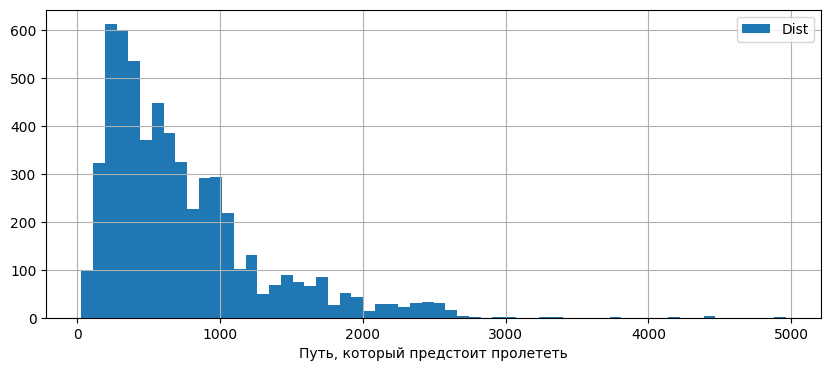

In [ ]:
delayed['Distance'].hist(figsize=(10, 4), bins=60, label = 'Dist')
plt.xlabel('Путь, который предстоит пролететь')
plt.legend();

In [ ]:
delayed.groupby('Dest').dep_delayed_15min.count().sort_values()

Dest
DLH      1
STT      1
SMX      1
BPT      1
BRO      1
      ... 
EWR    176
LAX    178
DFW    203
ORD    334
ATL    391
Name: dep_delayed_15min, Length: 247, dtype: int64

Получается топ-5 направлений это: ATL, ORD, DFW, LAX, EWR

In [ ]:
seasons = {'c-1' : 'Winter',
           'c-2' : 'Winter',
           'c-12' : 'Winter',
           'c-3' : 'Spring',
           'c-4' : 'Spring',
           'c-5' : 'Spring',
           'c-6' : 'Summer',
           'c-7' : 'Summer',
           'c-8' : 'Summer',
           'c-9' : 'Autumn',
           'c-10' : 'Autumn',
           'c-11' : 'Autumn'}

In [ ]:
delayed["seasons"] = pd.Series([seasons[month] for month in delayed["Month"]])

<ipython-input-45-66d72060eb0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delayed["seasons"] = pd.Series([seasons[month] for month in delayed["Month"]])


In [ ]:
delayed.groupby('seasons').dep_delayed_15min.count()

seasons
Autumn    260
Spring    245
Summer    337
Winter    277
Name: dep_delayed_15min, dtype: int64

Получается летом задержки происходят чаще всего.

In [ ]:
delayed.groupby('UniqueCarrier').dep_delayed_15min.count().sort_values()

UniqueCarrier
AQ      8
HA     12
TZ     17
DH     39
F9     48
HP     59
B6    107
YV    142
AS    142
FL    239
OH    247
CO    265
XE    310
US    313
NW    320
EV    332
OO    357
UA    415
MQ    425
DL    430
AA    546
WN    957
Name: dep_delayed_15min, dtype: int64

Топ-10 перевозчиков: AQ, HA, TZ, DH, F9, HP, B6, YV, AS, FL

In [ ]:
delayed.groupby('Origin').dep_delayed_15min.count().sort_values().tail(10)

Origin
PHL    123
EWR    159
LAX    159
PHX    159
IAH    165
LAS    180
DEN    187
DFW    264
ORD    403
ATL    482
Name: dep_delayed_15min, dtype: int64

Топ-10 безответственных аэропортов: PHL, EWR, LAX, PHX, IAH, LAS, DEN, DFW, ORD, ATL

In [ ]:
columns = list(delayed)
print(columns)

['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier', 'Origin', 'Dest', 'Distance', 'dep_delayed_15min']


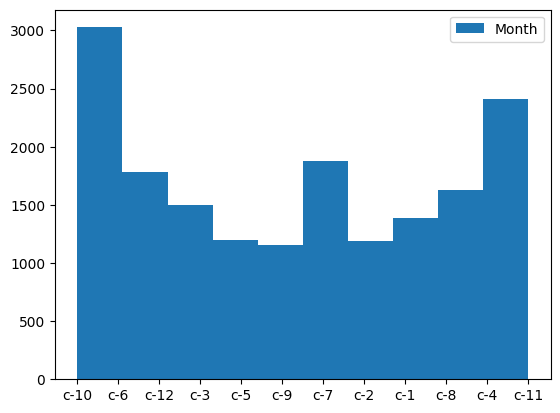

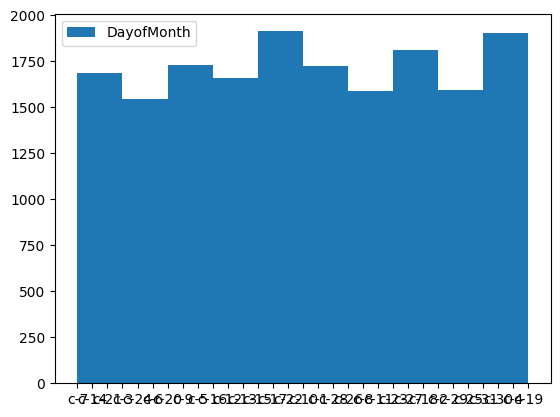

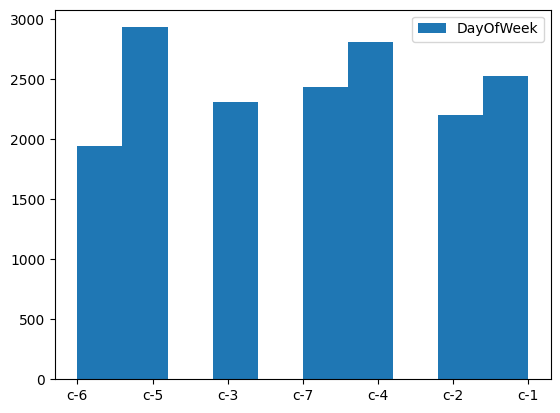

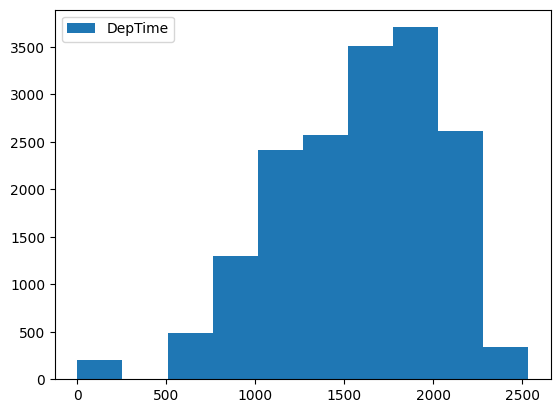

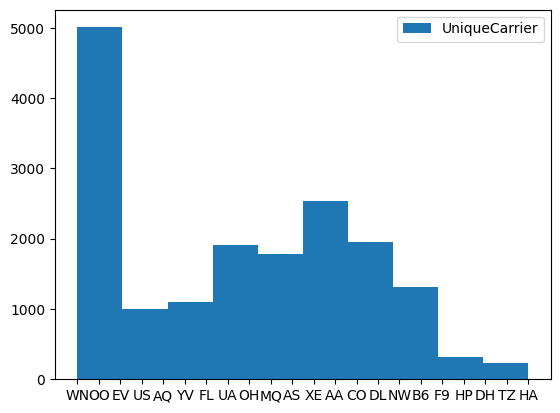

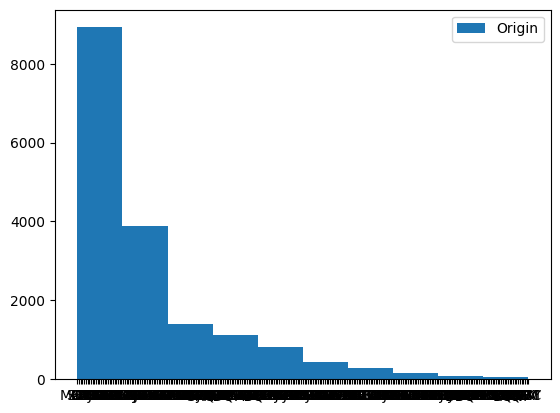

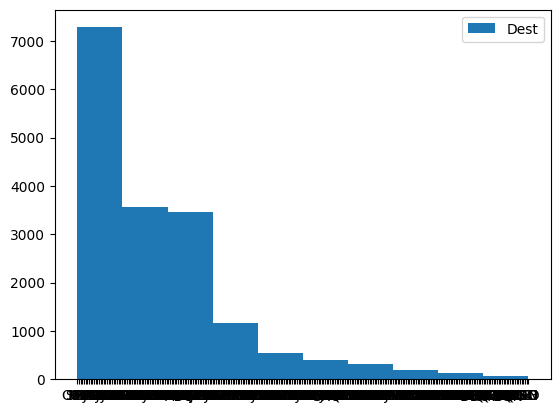

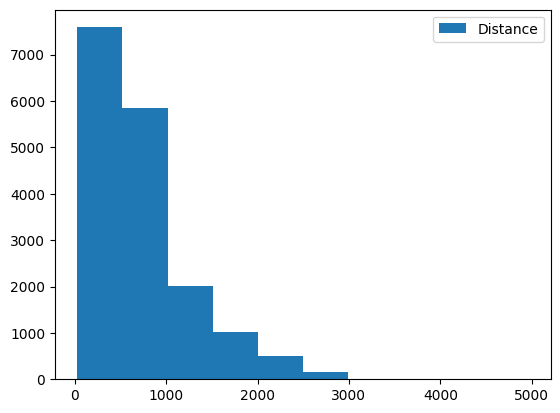

In [ ]:
for column in columns[:-1]:
  plt.figure()
  plt.hist(delayed[f'{column}'], label = f'{column}')
  plt.legend()

Из этих гистрграмм можно сделать вывод, что в выходные задержек как правило больше, также рейс чаще задерживают, если предстоит лететь на дальние расстояния.